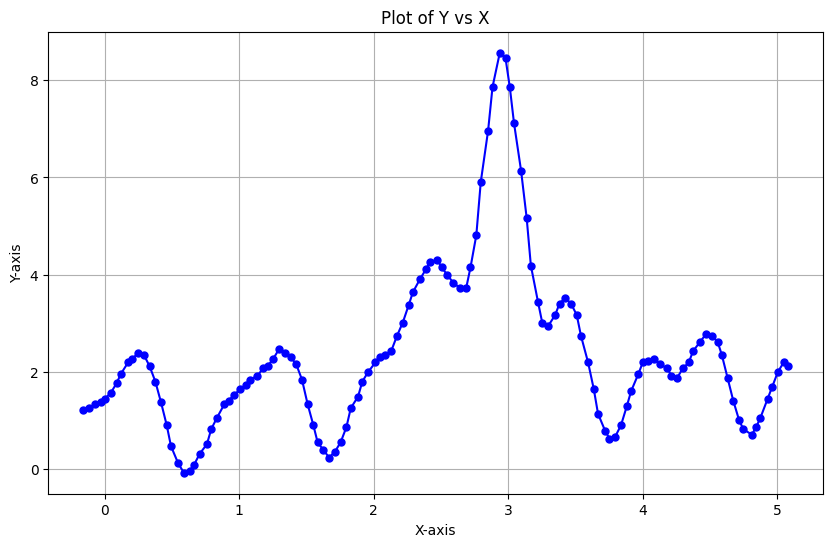

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data as a list of tuples
data = [
    (-0.15713872920278615, 1.209964412811388),
    (-0.1143656659670893, 1.2491103202846965),
    (-0.07155458223073863, 1.327402135231317),
    (-0.028781518995042, 1.3665480427046255),
    (0.0033458040575475856, 1.444839857651246),
    (0.04619490829455275, 1.5622775800711715),
    (0.08912005353286512, 1.758007117437721),
    (0.12136143808741684, 1.9537366548042705),
    (0.17500836451014345, 2.188612099644125),
    (0.20713568756273393, 2.2669039145907455),
    (0.24998479179973865, 2.3843416370106745),
    (0.29268181403412763, 2.345195729537366),
    (0.3351887337652464, 2.110320284697508),
    (0.37761961249505704, 1.797153024911033),
    (0.4199364297229069, 1.3665480427046255),
    (0.4622152264501018, 0.8967971530249095),
    (0.49384828299419103, 0.4661921708185055),
    (0.5469249019071083, 0.1138790035587185),
    (0.5894698421388815, -0.08185053380783103),
    (0.6322429053745777, -0.042704626334522544),
    (0.6644082489278222, 0.07473309608540646),
    (0.7073714146667882, 0.30960854092526446),
    (0.7609803205888617, 0.505338078291814),
    (0.7933357666453755, 0.8185053380782925),
    (0.8362989323843415, 1.053380782918147),
    (0.8899838793077226, 1.327402135231317),
    (0.9221112023603131, 1.405693950177934),
    (0.9649603065973174, 1.523131672597863),
    (1.0078094108343216, 1.640569395017792),
    (1.0506204945706727, 1.7188612099644125),
    (1.0827858381239164, 1.8362989323843415),
    (1.1362806825440281, 1.9145907473309585),
    (1.1791678072816865, 2.0711743772241995),
    (1.2112571098336224, 2.110320284697508),
    (1.2541442345712812, 2.2669039145907455),
    (1.297069379809594, 2.462633451957295),
    (1.339728381543328, 2.3843416370106745),
    (1.382387383277063, 2.3060498220640575),
    (1.4249703440094903, 2.14946619217082),
    (1.4674012227393014, 1.8362989323843415),
    (1.5096419989658423, 1.327402135231317),
    (1.5519588161936917, 0.8967971530249095),
    (1.5836679137390877, 0.544483985765126),
    (1.626250874471515, 0.387900355871885),
    (1.6688338352039422, 0.2313167259786475),
    (1.711682939440947, 0.34875444839857295),
    (1.7546080846792589, 0.544483985765126),
    (1.797647291419533, 0.857651245551601),
    (1.8300787784773553, 1.2491103202846965),
    (1.8837257049000824, 1.4839857651245545),
    (1.9160811509565958, 1.797153024911033),
    (1.959006296194909, 1.992882562277579),
    (2.012615202116982, 2.188612099644125),
    (2.0447805456702257, 2.3060498220640575),
    (2.087553608905922, 2.345195729537366),
    (2.1303646926422726, 2.4234875444839865),
    (2.1734038993825475, 2.7366548042704615),
    (2.216405085622167, 3.010676156583628),
    (2.2594823128630965, 3.362989323843415),
    (2.2917997384189555, 3.637010676156585),
    (2.3454846853423366, 3.9110320284697515),
    (2.38840983058065, 4.106761565836299),
    (2.420613194634548, 4.2633451957295385),
    (2.4740700185540048, 4.302491103202847),
    (2.5059692186026696, 4.145907473309608),
    (2.548552179335098, 3.9893238434163703),
    (2.591135140067524, 3.8327402135231328),
    (2.6444398819843657, 3.715302491103202),
    (2.687174924719409, 3.715302491103202),
    (2.7196444322778843, 4.145907473309608),
    (2.7630258235240444, 4.8113879003558715),
    (2.796141679593637, 5.907473309608541),
    (2.850587036530097, 6.9644128113879),
    (2.88351279009642, 7.864768683274022),
    (2.937615962526995, 8.569395017793594),
    (2.980236943760076, 8.451957295373667),
    (3.0117179183015486, 7.864768683274022),
    (3.043046810840405, 7.1209964412811395),
    (3.09551510174286, 6.142348754448399),
    (3.137299631961554, 5.1637010676156585),
    (3.1684004014964877, 4.185053380782918),
    (3.2210968154028654, 3.4412811387900355),
    (3.252729871946954, 3.010676156583628),
    (3.2953888736806887, 2.932384341637011),
    (3.349035800103416, 3.1672597864768655),
    (3.3813152051586224, 3.402135231316727),
    (3.4241643093956258, 3.5195729537366525),
    (3.4667852906287075, 3.402135231316727),
    (3.5092922103598267, 3.1672597864768655),
    (3.5409252669039146, 2.7366548042704615),
    (3.593811783313563, 2.188612099644125),
    (3.63601453903945, 1.640569395017792),
    (3.6675715545822305, 1.1316725978647675),
    (3.7206481734951486, 0.7793594306049805),
    (3.7525473735438153, 0.622775800711743),
    (3.7953204367795115, 0.6619217081850515),
    (3.838283602518479, 0.8967971530249095),
    (3.8813988502600605, 1.288256227758005),
    (3.913754296316575, 1.6014234875444835),
    (3.967515284241263, 1.9537366548042705),
    (3.9997946892964693, 2.188612099644125),
    (4.0425677525321655, 2.227758007117437),
    (4.085340815767862, 2.2669039145907455),
    (4.127961797000943, 2.14946619217082),
    (4.181304559418439, 2.0711743772241995),
    (4.213203759467105, 1.9145907473309585),
    (4.255900781701494, 1.87544483985765),
    (4.298825926939806, 2.0711743772241995),
    (4.341675031176811, 2.188612099644125),
    (4.373954436232017, 2.4234875444839865),
    (4.42756334215409, 2.6192170818505325),
    (4.470450466891749, 2.7758007117437735),
    (4.513147489126137, 2.7366548042704615),
    (4.555768470359218, 2.6192170818505325),
    (4.587553608905922, 2.345195729537366),
    (4.629832405633119, 1.87544483985765),
    (4.672111202360313, 1.405693950177934),
    (4.714466040088816, 1.0142348754448385),
    (4.74632721963683, 0.8185053380782925),
    (4.810315722237431, 0.70106761565836),
    (4.842519086291328, 0.857651245551601),
    (4.87476047084588, 1.053380782918147),
    (4.9285594792712235, 1.444839857651246),
    (4.96083888432643, 1.6797153024911005),
    (5.003878091066704, 1.992882562277579),
    (5.046803236305017, 2.188612099644125),
    (5.07877847735499, 2.110320284697508)
]

# Create a DataFrame
df = pd.DataFrame(data, columns=['X', 'Y'])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['X'], df['Y'], marker='o', linestyle='-', color='b', markersize=5)
plt.title('Plot of Y vs X')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid()
plt.show()


In [16]:
# Set the home base elevation value (MSL ft)
home_base_elev = 6.2
#home_base_elev = 3.67

In [17]:
# Add Columns Barrier_HeightObs and Barrier_HeightFcst to df
df['Barrier_HeightReq'] = df['Y'] - home_base_elev

print(df)

            X         Y  Barrier_HeightReq
0   -0.157139  1.209964          -4.990036
1   -0.114366  1.249110          -4.950890
2   -0.071555  1.327402          -4.872598
3   -0.028782  1.366548          -4.833452
4    0.003346  1.444840          -4.755160
..        ...       ...                ...
122  4.928559  1.444840          -4.755160
123  4.960839  1.679715          -4.520285
124  5.003878  1.992883          -4.207117
125  5.046803  2.188612          -4.011388
126  5.078778  2.110320          -4.089680

[127 rows x 3 columns]


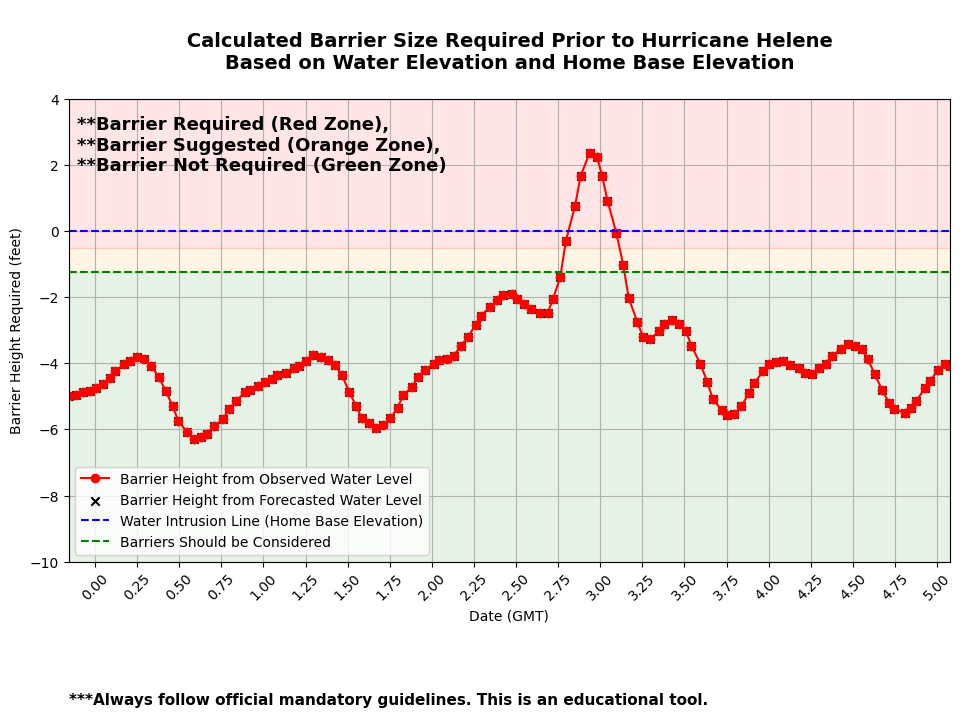

In [26]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Plot data on figure (x) vs (y)
plt.figure(figsize=(10, 8))

# Define tick values at 0.25 increments within the range
x_ticks = np.arange(df['X'].iloc[0], df['X'].iloc[-1] + 0.25, 0.25)
plt.xticks(x_ticks, rotation=45)

# X values will be 'Date(GMT)' and Y values will be 'Obs'
plt.plot(df['X'], df['Barrier_HeightReq'], marker='o', linestyle='-', color='r', label='Barrier Height from Observed Water Level')
# Add Fcst values as black 'X' markers
plt.scatter(df['X'], df['Barrier_HeightReq'], color='black', marker='x', label='Barrier Height from Forecasted Water Level')

# Add a horizontal line at y = 0
plt.axhline(y=0, color='b', linestyle='--', label=f'Water Intrusion Line (Home Base Elevation)')
# Add a horizontal line at y = 0
plt.axhline(y=-1.25, color='g', linestyle='--', label=f'Barriers Should be Considered')

# Add fill between y = -5 and y = -1
plt.fill_between(df['X'], -10, -1.25, color='green', alpha=0.1)
# Add fill between y = -1 and y = 0
plt.fill_between(df['X'], -1.25, -0.5, color='orange', alpha=0.1)
# Add fill between y = 3 and y = 0
plt.fill_between(df['X'], 4, -0.5, color='red', alpha=0.1)

# Formatting the plot
plt.xlabel('Date (GMT)')
plt.ylabel('Barrier Height Required (feet)')
plt.title('\n Calculated Barrier Size Required Prior to Hurricane Helene \nBased on Water Elevation and Home Base Elevation\n', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

# Set x-axis limits
plt.xlim(df['X'].iloc[0], df['X'].iloc[-1])



plt.ylim(-10,4)
# Reducing the number of dates/times on the x-axis
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(nbins=25))

# Rotate x-axis labels for better readability
#plt.xticks(rotation=45)

# Adding the note above the legend
plt.text(0.01, 0.90, "**Barrier Required (Red Zone),\n**Barrier Suggested (Orange Zone),\n**Barrier Not Required (Green Zone)",
         ha='left', va='center', transform=plt.gca().transAxes, fontsize=13, color='black', fontweight='bold')

# Adding the note bottom left
plt.text(0.001, -0.3, "***Always follow official mandatory guidelines. This is an educational tool.",
         ha='left', va='center', transform=plt.gca().transAxes, fontsize=11, color='black', fontweight='bold')

# tight_layout to automatically adjust plotting parameters
plt.tight_layout(pad=2.0)

# Save the plot as a JPEG file
#plt.savefig("C:/KG_MobileFiles_2024/Python/sample_plot2.jpg", format='jpg')

# Display the plot
plt.show()